# Prophet

In [1]:
%matplotlib inline
from fbprophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt

import warnings
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/peyton_manning.csv')

In [3]:
import numpy as np

np.exp(df['y'])

0       14629.0
1        5012.0
2        3582.0
3        3205.0
4        2680.0
         ...   
2900     2483.0
2901    10656.0
2902    30754.0
2903     9190.0
2904     7269.0
Name: y, Length: 2905, dtype: float64

In [4]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


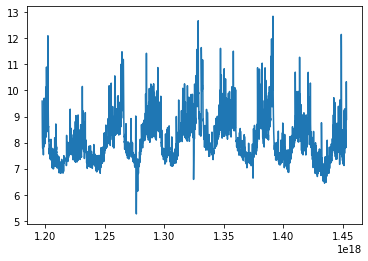

In [5]:
plt.plot(pd.to_datetime(df.ds), df.y);

In [6]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1000)
forecast = m.predict(future)

In [7]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3900,2018-10-12,6.536039,5.062658,8.620376,4.896142,8.167563,0.390711,0.390711,0.390711,-0.069578,-0.069578,-0.069578,0.460289,0.460289,0.460289,0.0,0.0,0.0,6.926750
3901,2018-10-13,6.535011,4.844271,8.508324,4.892564,8.168554,0.160760,0.160760,0.160760,-0.311713,-0.311713,-0.311713,0.472473,0.472473,0.472473,0.0,0.0,0.0,6.695771
3902,2018-10-14,6.533984,5.238915,8.786193,4.888987,8.169544,0.533207,0.533207,0.533207,0.048276,0.048276,0.048276,0.484932,0.484932,0.484932,0.0,0.0,0.0,7.067191
3903,2018-10-15,6.532956,5.557790,9.132923,4.885410,8.170333,0.849430,0.849430,0.849430,0.352295,0.352295,0.352295,0.497135,0.497135,0.497135,0.0,0.0,0.0,7.382386
3904,2018-10-16,6.531928,5.364916,8.924868,4.881833,8.171079,0.628204,0.628204,0.628204,0.119639,0.119639,0.119639,0.508566,0.508566,0.508566,0.0,0.0,0.0,7.160133


In [8]:
import numpy as np

forecast['y_converted'] = np.exp(forecast['yhat'])

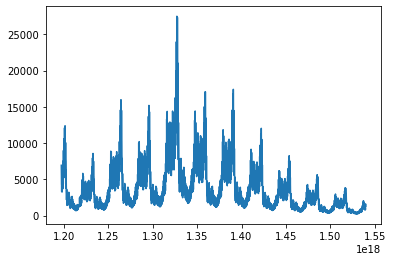

In [9]:
plt.plot(forecast.ds, forecast['y_converted'])

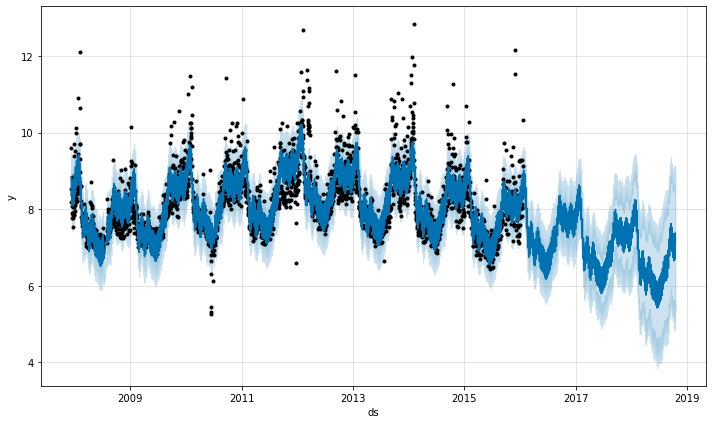

In [10]:
pd.plotting.register_matplotlib_converters()

m.plot(forecast);

### Modeling Holidays and Special Events
If you have holidays or other recurring events that you'd like to model, you must create a dataframe for them. It has two columns (`holiday` and `ds`) and a row for each occurrence of the holiday. It must include all occurrences of the holiday, both in the past (back as far as the historical data go) and in the future (out as far as the forecast is being made). If they won't repeat in the future, Prophet will model them and then not include them in the forecast.

You can also include columns `lower_window` and `upper_window` which extend the holiday out to `[lower_window, upper_window]` days around the date. For instance, if you wanted to included Christmas Eve in addition to Christmas you'd include `lower_window=-1,upper_window=0`. If you wanted to use Black Friday in addition to Thanksgiving, you'd include `lower_window=0,upper_window=1`. You can also include a column `prior_scale` to set the prior scale separately for each holiday, as described below.

Here we create a dataframe that includes the dates of all of Peyton Manning's playoff appearances:

In [11]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

superbowls

holidays = pd.concat((playoffs, superbowls))

In [12]:
holidays.head()

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1


In [13]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

In [14]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.044496,8.229916,9.438096,8.044496,8.044496,0.796333,0.796333,0.796333,0.0,...,0.329664,0.329664,0.329664,0.466669,0.466669,0.466669,0.0,0.0,0.0,8.840828
1,2007-12-11,8.042879,8.045056,9.190696,8.042879,8.042879,0.585416,0.585416,0.585416,0.0,...,0.133022,0.133022,0.133022,0.452393,0.452393,0.452393,0.0,0.0,0.0,8.628295
2,2007-12-12,8.041263,7.833211,9.001624,8.041263,8.041263,0.385785,0.385785,0.385785,0.0,...,-0.053220,-0.053220,-0.053220,0.439005,0.439005,0.439005,0.0,0.0,0.0,8.427048
3,2007-12-13,8.039646,7.823393,8.973149,8.039646,8.039646,0.367617,0.367617,0.367617,0.0,...,-0.059230,-0.059230,-0.059230,0.426847,0.426847,0.426847,0.0,0.0,0.0,8.407263
4,2007-12-14,8.038030,7.819075,9.001979,8.038030,8.038030,0.359888,0.359888,0.359888,0.0,...,-0.056332,-0.056332,-0.056332,0.416220,0.416220,0.416220,0.0,0.0,0.0,8.397918


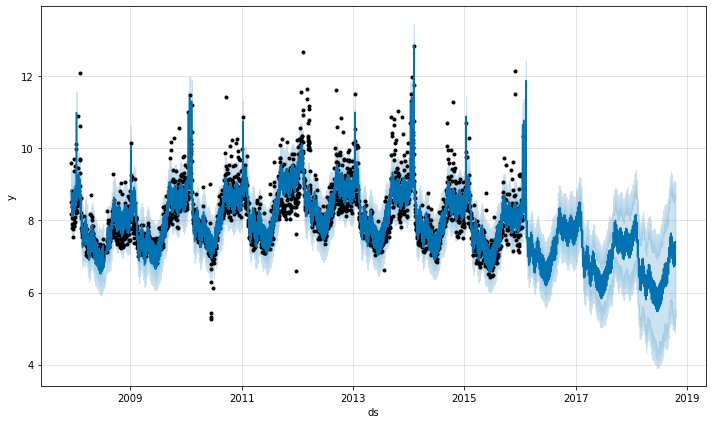

In [15]:
m.plot(forecast);

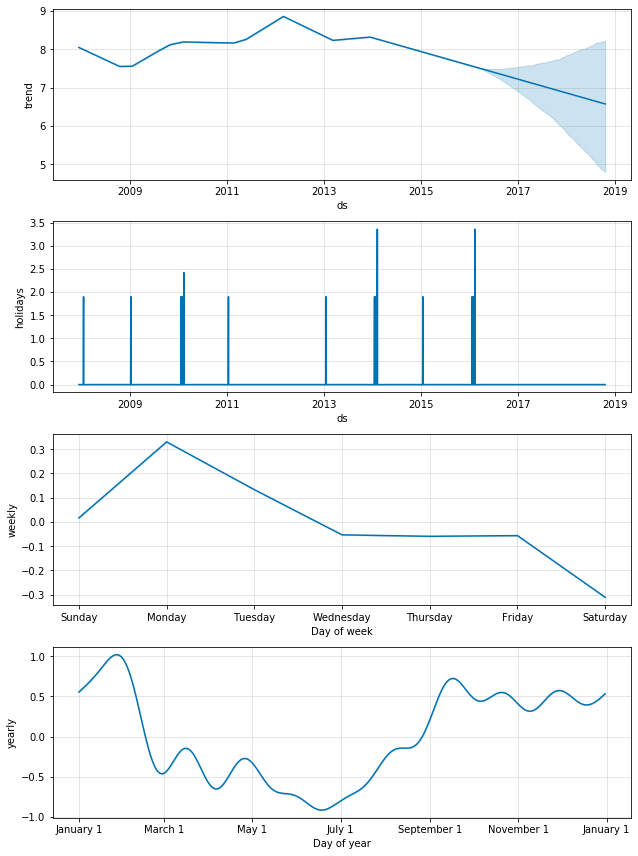

In [16]:
m.plot_components(forecast);

In [17]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
    
df['ds'].apply(nfl_sunday)
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)
df.head(10)

,ds,y,nfl_sunday
0,2007-12-10,9.590761,0
1,2007-12-11,8.519590,0
2,2007-12-12,8.183677,0
3,2007-12-13,8.072467,0
4,2007-12-14,7.893572,0
5,2007-12-15,7.783641,0
6,2007-12-16,8.414052,1
7,2007-12-17,8.829226,0
8,2007-12-18,8.382518,0
9,2007-12-19,8.069655,0


In [18]:
m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)


In [19]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [20]:
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

In [21]:
future.tail(10)

,ds,nfl_sunday
3260,2017-01-10,0
3261,2017-01-11,0
3262,2017-01-12,0
3263,2017-01-13,0
3264,2017-01-14,0
3265,2017-01-15,1
3266,2017-01-16,0
3267,2017-01-17,0
3268,2017-01-18,0
3269,2017-01-19,0


In [22]:
forecast = m.predict(future)

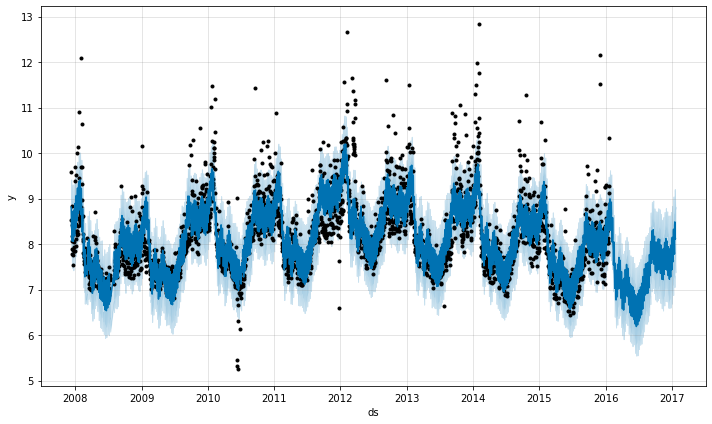

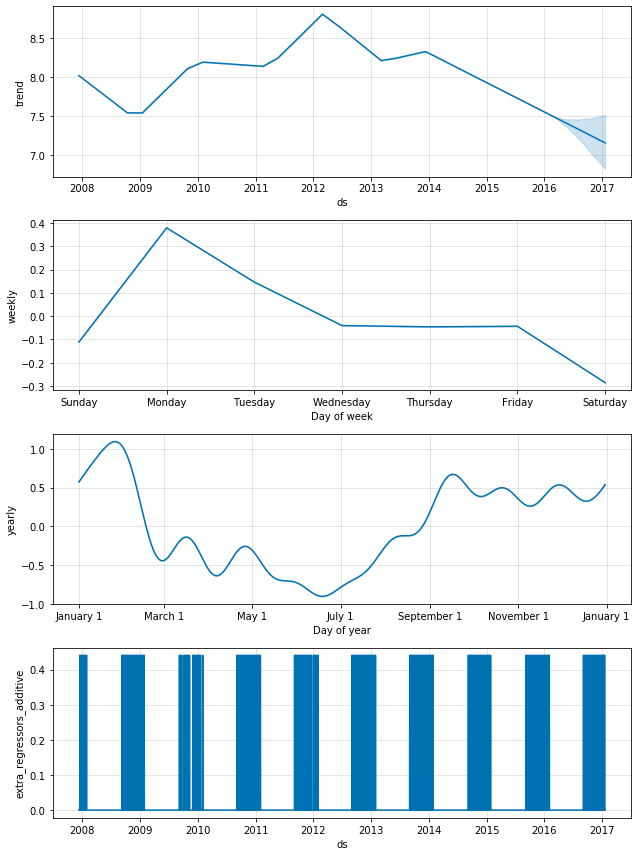

In [23]:
m.plot(forecast);
m.plot_components(forecast);

Above we have included the superbowl days as both playoff games and superbowl games. This means that the superbowl effect will be an additional additive bonus on top of the playoff effect.

Once the table is created, holiday effects are included in the forecast by passing them in with the `holidays` argument. Here we do it with the Peyton Manning data from the Quickstart:

In [24]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

The holiday effect can be seen in the `forecast` dataframe:

In [25]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224174,1.197584
2191,2014-02-03,1.899740,1.459690
2532,2015-01-11,1.224174,0.000000
2533,2015-01-12,1.899740,0.000000
2901,2016-01-17,1.224174,0.000000
2902,2016-01-18,1.899740,0.000000
2908,2016-01-24,1.224174,0.000000
2909,2016-01-25,1.899740,0.000000
2922,2016-02-07,1.224174,1.197584
2923,2016-02-08,1.899740,1.459690


The holiday effects will also show up in the components plot, where we see that there is a spike on the days around playoff appearances, with an especially large spike for the superbowl:

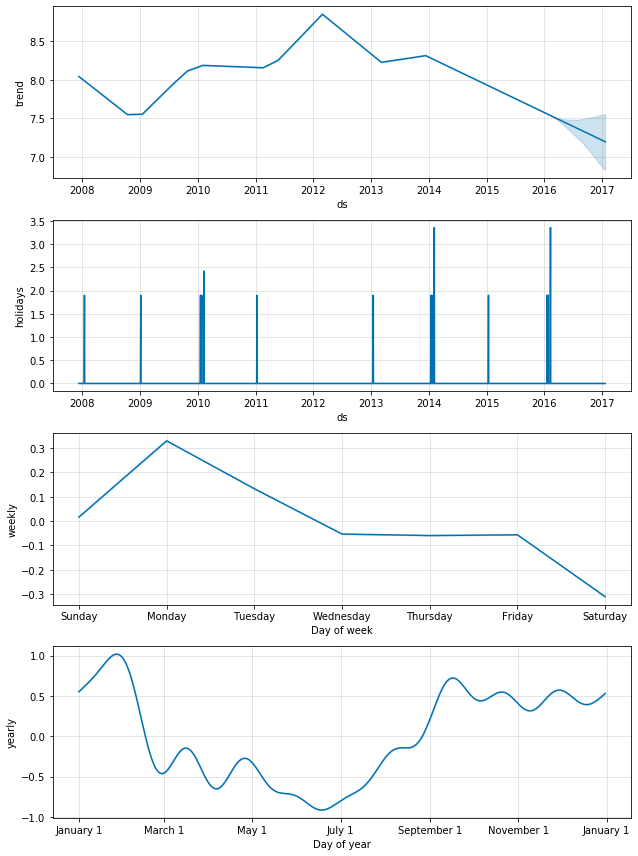

In [26]:
m.plot_components(forecast);

Individual holidays can be plotted using the `plot_forecast_component` function (imported from `fbprophet.plot` in Python) like `plot_forecast_component(forecast, 'superbowl')` to plot just the superbowl holiday component.

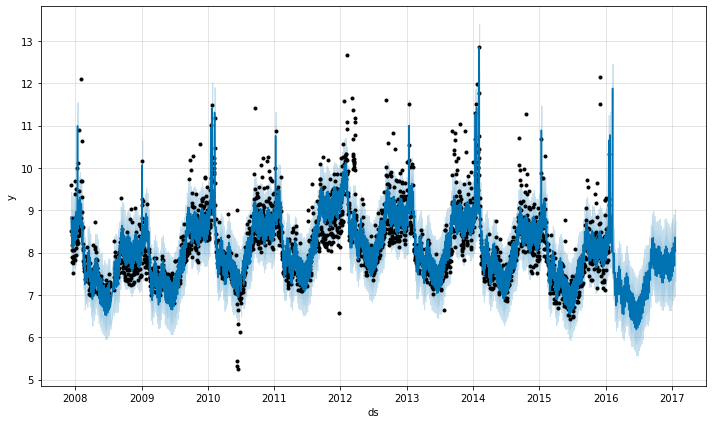

In [27]:
m.plot(forecast);

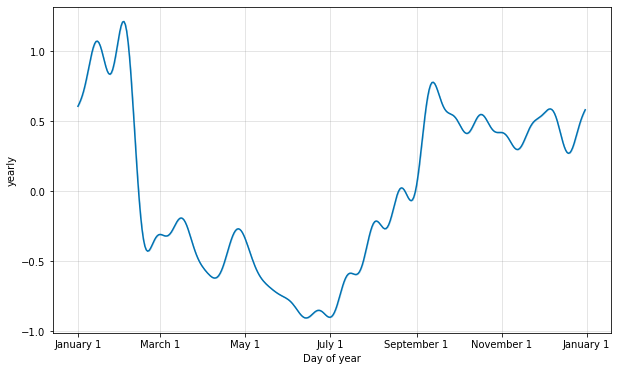

In [28]:
from fbprophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)


### Additional regressors
Additional regressors can be added to the linear part of the model using the `add_regressor` method or function. A column with the regressor value will need to be present in both the fitting and prediction dataframes. For example, we can add an additional effect on Sundays during the NFL season. On the components plot, this effect will show up in the 'extra_regressors' plot:

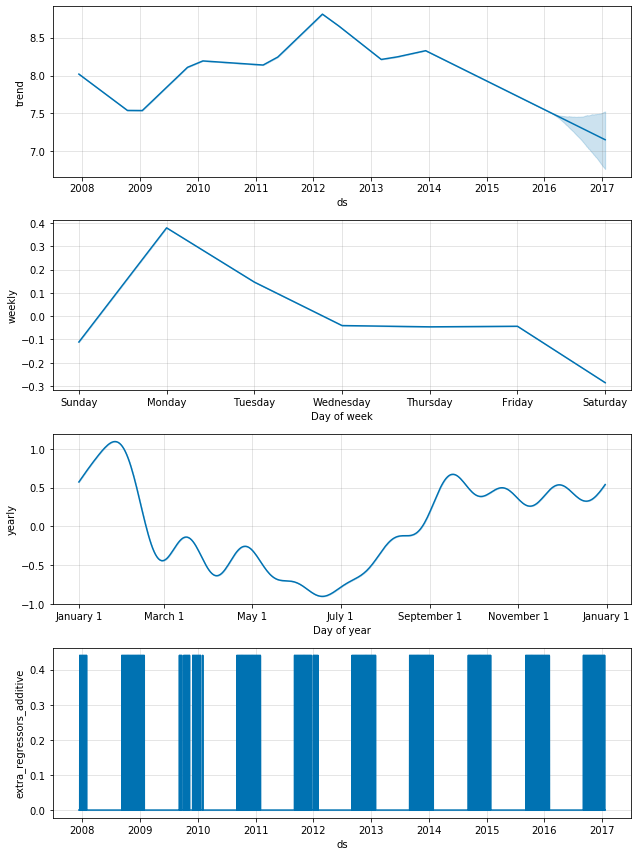

In [29]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast);

NFL Sundays could also have been handled using the "holidays" interface described above, by creating a list of past and future NFL Sundays. The `add_regressor` function provides a more general interface for defining extra linear regressors, and in particular does not require that the regressor be a binary indicator. Another time series could be used as a regressor, although its future values would have to be known.

The `add_regressor` function has optional arguments for specifying the prior scale (holiday prior scale is used by default) and whether or not the regressor is standardized - see the docstring with `help(Prophet.add_regressor)` in Python and `?add_regressor` in R. Note that regressors must be added prior to model fitting.

The extra regressor must be known for both the history and for future dates. It thus must either be something that has known future values (such as `nfl_sunday`), or something that has separately been forecasted elsewhere. Prophet will also raise an error if the regressor is constant throughout the history, since there is nothing to fit from it.

Extra regressors are put in the linear component of the model, so the underlying model is that the time series depends on the extra regressor as either an additive or multiplicative factor (see the next section for multiplicativity).

In [30]:
import numpy as np

df = pd.DataFrame({
    'date': pd.date_range(start='2018-04-15', periods=100),
    'sleep': np.random.normal(8, 2, size=100)
})

df['date'] = pd.to_datetime(df['date'])
df['sleep'] = df.apply(lambda row: np.where(
    row['date'].weekday() in [5, 6], 
    round(row['sleep'] + np.random.normal(2, 0.5), 1), 
    round(row['sleep'], 1)
), axis=1)

df['got_drunk'] = np.where(df['sleep'] < 6, 1, 0)

df['sleep'] = df['sleep'].astype('float64')

df.tail()

,date,sleep,got_drunk
95,2018-07-19,7.3,0
96,2018-07-20,7.2,0
97,2018-07-21,14.3,0
98,2018-07-22,12.2,0
99,2018-07-23,8.4,0


In [31]:
df = df.rename(columns={'date': 'ds', 'sleep': 'y'})
df['ds'] = pd.to_datetime(df['ds'].astype('str'))

model = Prophet(daily_seasonality=False)
model.add_regressor('got_drunk')
model.fit(df)

future = model.make_future_dataframe(100)
future['got_drunk'] = 0

forecast = model.predict(future)

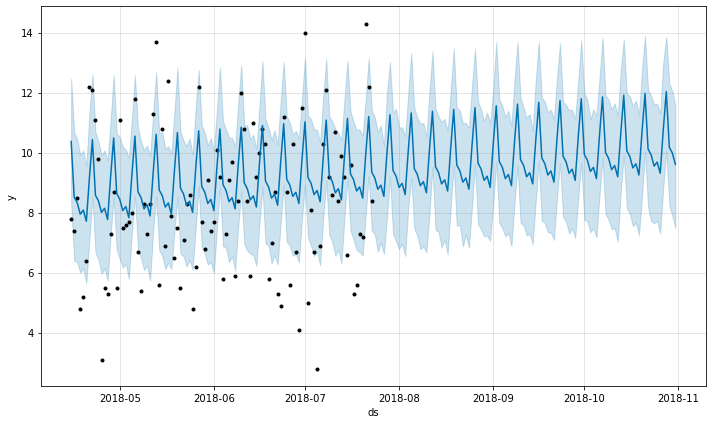

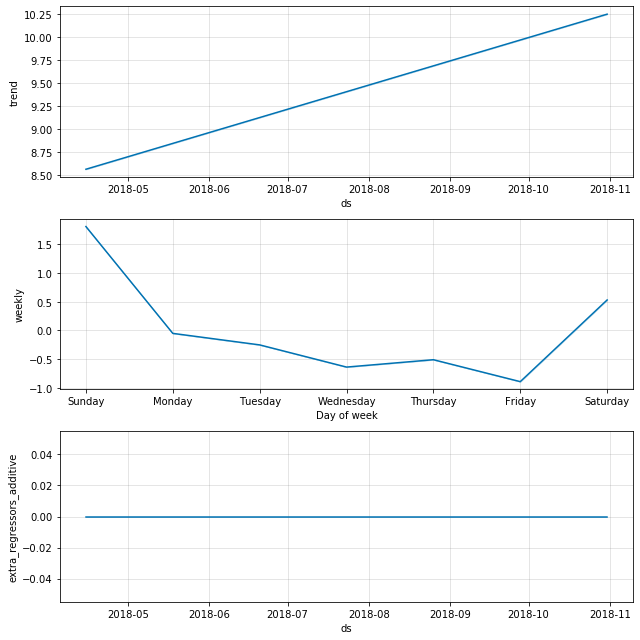

In [32]:
model.plot(forecast);
model.plot_components(forecast);